# Estudando SVM

In [201]:
import pandas as pd

In [202]:
eleicoes = pd.read_csv('/home/lsp/dados/am/eleicoes_2006_a_2010.csv')
eleicoes_2014 = pd.read_csv('/home/lsp/dados/am/eleicoes_2014.csv')

In [203]:
def skeweds(dataframe):
    numeric_features = dataframe.dtypes[dataframe.dtypes != "object"].index
    skewed_features = dataframe[numeric_features].apply(lambda x: x.dropna().skew())
    skewed_features = skewed_features[skewed_features > 0.75]
    skewed_features = skewed_features.index
    dataframe[skewed_features] = np.log1p(dataframe[skewed_features])
    return dataframe

In [204]:
def dummies(dataframe):
    dataframe = pd.get_dummies(dataframe)
    return dataframe

In [205]:
def fill_NaN_with_mean(dataframe):
    dataframe = dataframe.fillna(dataframe.mean())
    return dataframe

In [206]:
def normalizacao_dados(dataframe):
    dataframe = fill_NaN_with_mean(dummies(skeweds(dataframe)))
    return dataframe

In [207]:
eleicoes = normalizacao_dados(eleicoes)

In [208]:
eleicoes.head()

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006,10001,1.945910,1.945910,9.717218,7.925760,8.324939,9.105091,8.748464,7.170888,...,0,0,0,0,0,0,1,0,0,0
1,2006,10002,2.639057,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,...,0,0,0,0,0,0,0,0,0,0
2,2006,10002,2.890372,2.833213,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,...,0,0,0,0,0,0,0,0,0,0
3,2006,10002,1.945910,1.945910,8.007074,6.216979,8.324939,7.048386,7.004991,6.621406,...,0,0,0,0,0,0,0,0,0,0
4,2006,10003,3.891820,3.891820,9.634619,7.466020,8.324939,10.837206,10.011960,11.141035,...,0,0,0,0,0,0,0,0,0,0


In [209]:
eleicoes_2014 = normalizacao_dados(eleicoes_2014)

In [210]:
eleicoes_2014.head()

,ano,sq_candidato,qtd_doacoes,qtd_doadores,total_receita,media_receita,recursos de outros candidatos/comitês,recursos de pessoas físicas,recursos de pessoas jurídicas,recursos próprios,...,descricao_ocupacao_TÉCNICO DE QUÍMICA,descricao_ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,descricao_ocupacao_TÉCNICO EM EDIFICAÇÕES,descricao_ocupacao_TÉCNICO EM INFORMÁTICA,descricao_ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"descricao_ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",descricao_ocupacao_VEREADOR,descricao_ocupacao_VETERINÁRIO,descricao_ocupacao_VIGILANTE,descricao_ocupacao_ZOOTECNISTA
0,2014,10000000135,1.386294,1.386294,7.365813,6.268465,8.442226,7.313887,10.039024,8.505303,...,0,0,0,0,0,0,0,0,0,0
1,2014,10000000142,1.791759,1.791759,8.064951,6.456770,8.442226,8.039480,10.039024,8.505303,...,0,0,0,0,0,0,0,0,1,0
2,2014,10000000158,3.713572,3.663562,12.716781,9.079305,7.562198,11.092869,11.945818,11.652696,...,0,0,0,0,0,0,0,0,0,0
3,2014,10000000161,3.401197,3.401197,11.962218,8.595101,10.574474,11.138739,9.741027,8.826758,...,0,0,0,0,0,0,0,0,0,0
4,2014,10000000163,5.081404,4.990433,13.474546,8.491143,9.210440,12.757293,12.531776,11.264477,...,0,0,0,0,0,0,0,0,0,0


## Iniciando em SVM

In [212]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Automatically created module for IPython interactive environment


In [213]:
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [214]:
clf.predict([[4, 0]])

array([1])

In [215]:
clf.decision_function(X)

array([-0.63212056,  0.63212056])

In [216]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Exemplo: [Plot different SVM classifiers in the iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py)

In [217]:
print(__doc__)

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

Automatically created module for IPython interactive environment


In [218]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [219]:
iris = datasets.load_iris()
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [220]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [221]:
iris.data[:5, :2]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])

In [222]:
x = iris.data[:, :2]

In [223]:
y = iris.target

In [239]:
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C))

In [240]:
models = (clf.fit(x, y) for clf in models)

In [241]:
titles = ('SVC com Kernel Linear', 'LinearSVC com Kernel Linear')

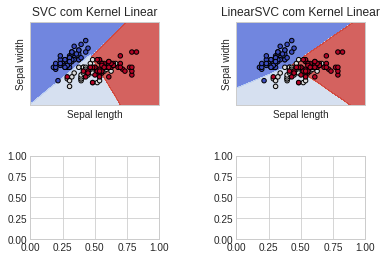

In [242]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()